In [6]:
from epw import epw
import pandas as pd

In [60]:
blddensity=0.15
treecover=0.15
grasscover=0.35

In [71]:
def generate_variants():
    variants = [
        (0.05, 0.25, 0.45),
        (0.10, 0.20, 0.40),
        (0.15, 0.15, 0.35),  # BASELINE
        (0.20, 0.10, 0.30),
        (0.25, 0.05, 0.25),
        (0.30, 0.00, 0.20),
        (0.35, 0.00, 0.15)
    ]
    return variants

variants = generate_variants()
variants

[(0.05, 0.25, 0.45),
 (0.1, 0.2, 0.4),
 (0.15, 0.15, 0.35),
 (0.2, 0.1, 0.3),
 (0.25, 0.05, 0.25),
 (0.3, 0.0, 0.2),
 (0.35, 0.0, 0.15)]

In [93]:


# Or if you're creating a new dataframe:
results_df = pd.DataFrame({
   # 'Parameters': ['params_string'],
    #'Temperatures': ['0,1,2,3'],  # Assuming 'temperatures' is your list of results
    # ... other columns as needed
})   
results_df 

""


In [94]:
from uwg import UWG
import pandas as pd

# Define the .epw, .uwg paths to create an uwg object.
epw_path = "EPW_Files/USA_GA_Fulton.County.AP.722195_TMY3.epw" # available in resources directory.

# Initialize an empty list to store results for each variant
results = []

for blddensity, treecover, grasscover in variants:
    # Initialize the UWG model by passing parameters as arguments, or relying on defaults
    model = UWG.from_param_args(epw_path=epw_path, bldheight=11, 
                                blddensity=blddensity, 
                                vertohor=0.8, 
                                treecover=treecover, 
                                grasscover=grasscover, 
                                vegstart=3, 
                                vegend=11, 
                                albveg=0.15, 
                                h_obs= 3, 
                                windmin=0.5,
                                zone='3A', nday=365)

    model.generate()
    model.simulate()

    # Write the simulation result to a file.
    temperatures = [ucm.canTemp-273.15 for ucm in model.UCMData[:8760]]

    params_string = f"BD{blddensity:.2f}_TC{treecover:.2f}_GC{grasscover:.2f}"

    # Create a dictionary for this variant's results
    variant_result = {'Parameters': params_string}
    variant_result.update({f'Hour_{i+1}': temp for i, temp in enumerate(temperatures)})

    # Append this variant's results to the results list
    results.append(variant_result)

# Create the final dataframe from all results
results_df = pd.DataFrame(results)

Simulating new temperature and humidity values for 365 days from 1/1.
Simulating Day 1
Simulating Day 2
Simulating Day 3
Simulating Day 4
Simulating Day 5
Simulating Day 6
Simulating Day 7
Simulating Day 8
Simulating Day 9
Simulating Day 10
Simulating Day 11
Simulating Day 12
Simulating Day 13
Simulating Day 14
Simulating Day 15
Simulating Day 16
Simulating Day 17
Simulating Day 18
Simulating Day 19
Simulating Day 20
Simulating Day 21
Simulating Day 22
Simulating Day 23
Simulating Day 24
Simulating Day 25
Simulating Day 26
Simulating Day 27
Simulating Day 28
Simulating Day 29
Simulating Day 30
Simulating Day 31
Simulating Day 32
Simulating Day 33
Simulating Day 34
Simulating Day 35
Simulating Day 36
Simulating Day 37
Simulating Day 38
Simulating Day 39
Simulating Day 40
Simulating Day 41
Simulating Day 42
Simulating Day 43
Simulating Day 44
Simulating Day 45
Simulating Day 46
Simulating Day 47
Simulating Day 48
Simulating Day 49
Simulating Day 50
Simulating Day 51
Simulating Day 52
Sim

In [106]:
hottest_hour = 4526
results_df.index = results_df['Parameters']
plotting_df = results_df.iloc[:,hottest_hour-12:hottest_hour+12]

In [109]:
plotting_df

,Hour_4514,Hour_4515,Hour_4516,Hour_4517,Hour_4518,Hour_4519,Hour_4520,Hour_4521,Hour_4522,Hour_4523,...,Hour_4528,Hour_4529,Hour_4530,Hour_4531,Hour_4532,Hour_4533,Hour_4534,Hour_4535,Hour_4536,Hour_4537
Parameters,,,,,,,,,,,,,,,,,,,,,
BD0.05_TC0.25_GC0.45,22.192711,21.871902,21.723332,22.067478,21.865658,22.198534,23.108420,23.796488,24.883159,26.012763,...,26.431296,26.227364,25.904262,25.536126,24.984607,24.607692,24.320062,24.075765,23.829286,23.559251
BD0.10_TC0.20_GC0.40,22.200765,21.878718,21.729878,22.076324,21.880829,22.214661,23.124007,23.814817,24.908773,26.034646,...,26.461393,26.153782,25.837739,25.542908,25.024203,24.634651,24.340369,24.091723,23.832080,23.554307
BD0.15_TC0.15_GC0.35,22.209024,21.885823,21.736769,22.085530,21.897232,22.229901,23.136265,23.827836,24.925211,26.049904,...,26.482515,26.165179,25.845851,25.552457,25.060946,24.663414,24.363243,24.110609,23.840216,23.556819
BD0.20_TC0.10_GC0.30,22.217911,21.893566,21.744329,22.095464,21.915532,22.245666,23.147969,23.839611,24.939283,26.063702,...,26.501006,26.179263,25.856322,25.563430,25.096799,24.693243,24.387540,24.131120,23.851059,23.563067
BD0.25_TC0.05_GC0.25,22.227533,21.902050,21.752671,22.106246,21.935850,22.262336,23.160082,23.851386,24.952763,26.077419,...,26.519201,26.194751,25.868135,25.575593,25.132377,24.723844,24.412806,24.152739,23.863700,23.571839
BD0.30_TC0.00_GC0.20,22.238047,21.911428,21.761958,22.118063,21.958590,22.280314,23.173179,23.863821,24.966519,26.091763,...,26.537893,26.211680,25.881320,25.589121,25.167961,24.755127,24.438882,24.175280,23.877810,23.582724
BD0.35_TC0.00_GC0.15,22.249534,21.921872,21.772424,22.131185,21.984669,22.300317,23.188032,23.877288,24.980308,26.105815,...,26.555042,26.228459,25.894589,25.603202,25.199172,24.784093,24.464164,24.197926,23.894314,23.597733


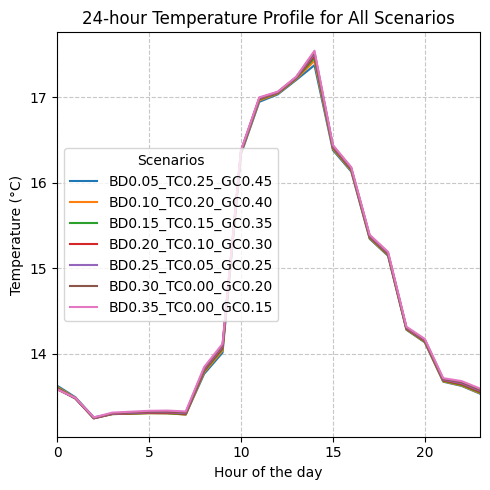

In [118]:
import matplotlib.pyplot as plt

# Assuming results_df is your DataFrame
# We'll use the first 24 columns (hours) for this plot

# Create a new figure and axis
fig, ax = plt.subplots(figsize=(5, 5))

# Plot each row (scenario) as a separate line
for index, row in results_df.iterrows():
    # Get the parameter string for the legend
    params = row['Parameters']
    
    # Plot the first 24 hours of temperature data
    ax.plot(range(24), row.iloc[1:25], label=params)

# Customize the plot
ax.set_xlabel('Hour of the day')
ax.set_ylabel('Temperature (°C)')
ax.set_title('24-hour Temperature Profile for All Scenarios')
ax.legend(title='Scenarios')# bbox_to_anchor=(1.05, 1))#, loc='upper left')
ax.set_xlim(0, 23)  # Set x-axis limits to 0-23 hours

# Add gridlines for better readability
ax.grid(True, linestyle='--', alpha=0.7)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()